In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Computation':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Computation')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12104/2346635964.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

In [2]:
#| echo: false
import pandas as pd
data1 = pd.read_csv('mixture1.dat', delimiter="\t" , header=None)
data1_2d = data1.iloc[:, 1:3].to_numpy()

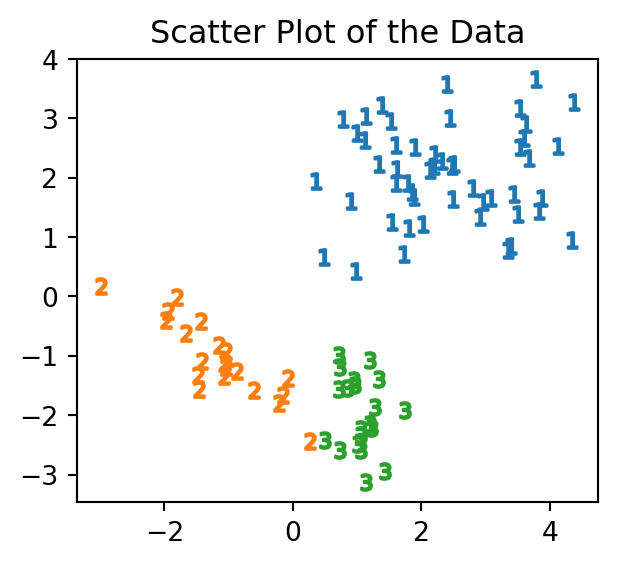

In [3]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

markers1 = data1.iloc[:, 0]
x1 = data1.iloc[:, 1]
y1 = data1.iloc[:, 2]

plt.figure(figsize=(3.5, 3))
for marker in np.unique(markers1):
    plt.scatter(x1[markers1 == marker], y1[markers1 == marker], label=f'Cluster {marker}', marker=f'${marker}$') 

plt.title('Scatter Plot of the Data')
plt.show()

In [4]:
#| echo: false
import math
from itertools import permutations

def d(x,y):
    """
    ２次元での Euclid 距離を計算する関数

    Parameter:
    - x,y: (2,)-numpy.ndarray
    """
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

def normalize(x):
    """
    ラベル番号データを昇順にする関数

    Parameter:
    - x: (N,)-numpy.ndarray
    """
    labels = [x[0]]
    for i in x:
        if i not in labels:
            labels.append(i)

    conditions = [x == labels[i] for i in range(len(labels))]
    choices = [i + 1 for i in range(len(labels))]

    return np.select(conditions, choices)

def normalize_abnormal(x):
    """
    ラベル番号データを昇順にする関数

    Parameter:
    - x: (N,)-numpy.ndarray
    """
    labels = [x[0]]
    for i in x:
        if i not in labels:
            labels.append(i)

    conditions = [x == labels[i] for i in range(len(labels))]
    choices = [1,3,2]

    return np.select(conditions, choices)

def accuracy(ans, pred):
    """
    クラスタリング結果と正解値とを比べ，正答数と正解率を返す関数

    Parameters:
    - ans: (N,)-numpy.ndarray 正解値
    - pred: (N,)-numpy.ndarray 予測値

    ただし，成分は 1,2,3 のみとする．
    """
    perms = permutations([1, 2, 3])
    num_correct = []

    for perm in perms:
        mapping = {1: perm[0], 2: perm[1], 3: perm[2]}
        permuted_pred = np.array([mapping[value] for value in pred])
        num_correct.append(np.sum(ans == permuted_pred))

    total_correct = max(num_correct)
    accuracy = total_correct / len(ans)
    return total_correct, accuracy

def accuracy4(ans, pred):
    """
    正解値と予測値を比べ，正答数と正解率を print する関数

    Parameters:
    - ans: (N,)-numpy.ndarray 正解値
    - pred: (N,)-numpy.ndarray 予測値
    """
    perms = permutations([1, 2, 3, 4])
    num_correct = []

    for perm in perms:
        mapping = {1: perm[0], 2: perm[1], 3: perm[2], 4: perm[3]}
        permuted_pred = np.array([mapping[value] for value in pred])
        num_correct.append(np.sum(ans == permuted_pred))

    total_correct = max(num_correct)
    accuracy = total_correct / len(ans)
    return total_correct, accuracy

In [5]:
#| code-fold: true
class kmeans_2d:
    """
    ２次元データに対するソフト K-平均法の実装．

    Usage:
        kmeans = kmeans_2d(data, K, init, beta)
        kmeans.run()

    Parameters:
    - data: (N,2)-numpy.ndarray
    - K: int クラスター数
    - init: (2,K)-numpy.ndarray 初期値
    - beta: float 硬度パラメータ
    """

    def __init__(self, data, K, init, beta, max_iter=100):
        self.data = np.array(data, dtype=float)
        self.K = K
        self.init = np.array(init, dtype=float)
        self.beta = float(beta)
        self.max_iter = max_iter
        self.N = data.shape[0]  # データ数
        self.I = data.shape[1]  # 次元数 今回は２
        self.m = init  # クラスター中心の初期化．2×K行列．
        self.r = np.zeros((K, self.N), dtype=float)  # 負担率．K×N行列．
        self.history = [init.copy()] # クラスター中心の履歴．2×K行列．
    
    def soft_assigment(self):
        """soft K-means の場合の負担率の更新"""
        for i in range(self.N):
            distances = np.array([d(self.data[i], self.m[:,j]) ** 2 for j in range(self.K)]) # (N,)-numpy.ndarray
            denominator_ = np.sum(np.exp(-self.beta * distances))  # 分母
            self.r[:,i] = np.exp(- self.beta * distances) / denominator_

    def hard_assigment(self):
        """hard K-means の場合の負担率の更新"""
        for i in range(self.N):
            distances = np.array([d(self.data[i], self.m[:,j]) for j in range(self.K)]) # (N,)-numpy.ndarray
            k_hat = np.argmin(distances)  # 最小距離のクラスター番号
            self.r[:,i] = 0  # 前のループの結果をリセット
            self.r[k_hat,i] = 1
    
    def update(self):
        """クラスター中心の更新"""
        new_m = np.zeros_like(self.m, dtype=float) # ここで float にしないと，クラスター中心が整数に限られてしまう．
        numerator = np.dot(self.r, self.data)  # (K,2)-numpy.ndarray
        denominator = np.sum(self.r, axis=1)  # 各クラスターの負担率の和
        for k in range(self.K):
            if denominator[k] > 0:
                new_m[:,k] = numerator[k] / denominator[k]
            else:
                new_m[:,k] = self.m[:,k]
        self.m = new_m

    def fetch_cluster(self):
        """最終的なクラスター番号を格納した (N,)-array を返す"""
        return np.argmax(self.r, axis=0)
    
    def fetch_history(self):
        """クラスター中心の履歴を格納したリストを，３次元の np.array に変換して返す"""
        return np.stack(self.history, axis=0)

    def run_soft(self):
        """soft K-means アルゴリズムの実行"""
        for _ in range(self.max_iter):
            self.soft_assigment()
            self.update()
            self.history.append(self.m.copy())
            if np.allclose(self.history[-1], self.history[-2]):
                break
    
    def run_hard(self):
        """hard K-means アルゴリズムの実行"""
        for _ in range(self.max_iter):
            self.hard_assigment()
            self.update()
            self.history.append(self.m.copy())
            if np.allclose(self.history[-1], self.history[-2]):
                break

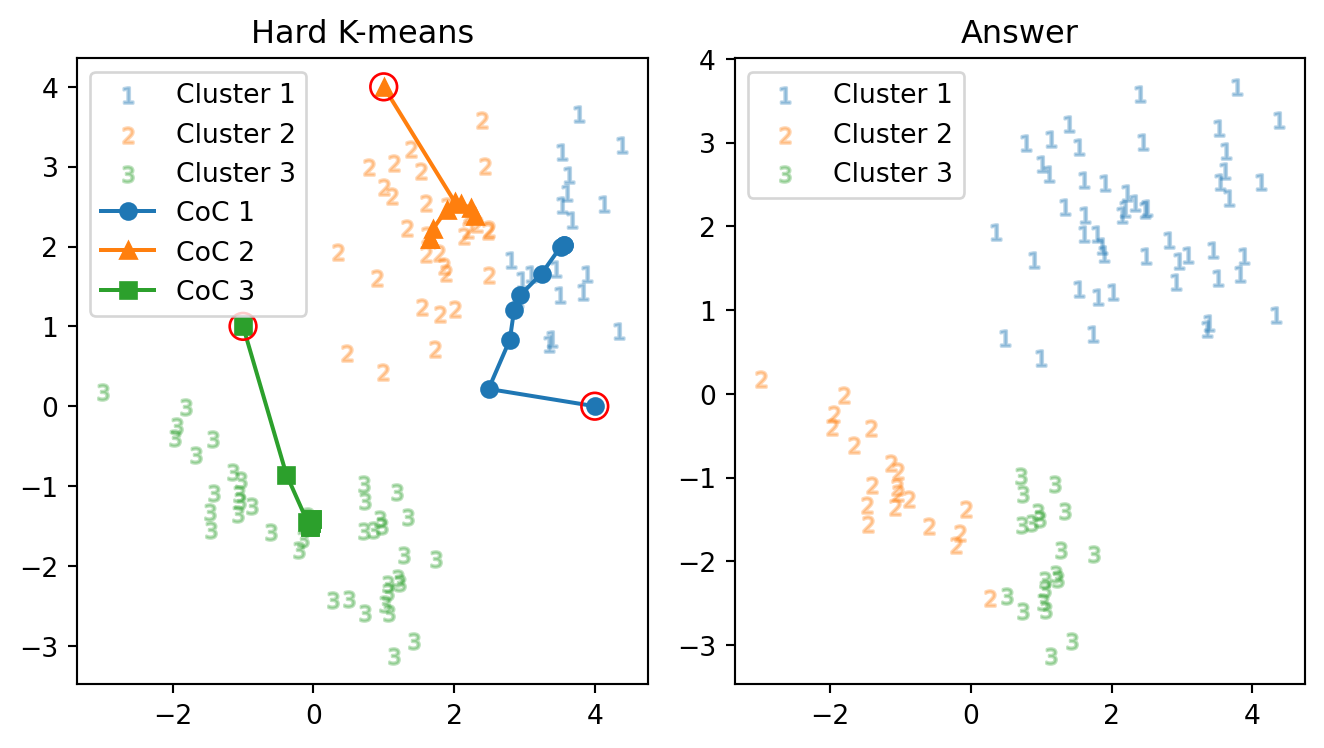

正解数: 51     正解率: 56.7 %     反復数: 9 回


In [6]:
#| echo: false
#| label: fig-1
#| fig-cap: 'ハード K-平均法によるクラスタリングの結果．初期値は $(m_1,m_2,m_3)=\paren{\vctr{4}{0},\vctr{1}{4},\vctr{-1}{1}}$．赤丸で囲まれている点がクラスター中心 (CoC / Center of Cluster) の初期値で，その後の移動が図示されている．'
initial_points = np.array([[-1,1],[1,4],[4,0]])

result = kmeans_2d(data1_2d, 3, initial_points.T, 0.1)
result.run_hard()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [2,1,0]
default = [0,1,2]
markerstyle = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markerstyle[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Hard K-means')

axs[0].legend()

# markerを使用したプロット
for marker in np.unique(markers1):
    axs[1].scatter(x1[markers1 == marker], y1[markers1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

axs[1].set_title('Answer')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct, accr = accuracy(ans, normalize(pred))
iteration = history.shape[0]
print(f'正解数: {num_correct}     正解率: {accr*100:.1f} %     反復数: {iteration} 回')

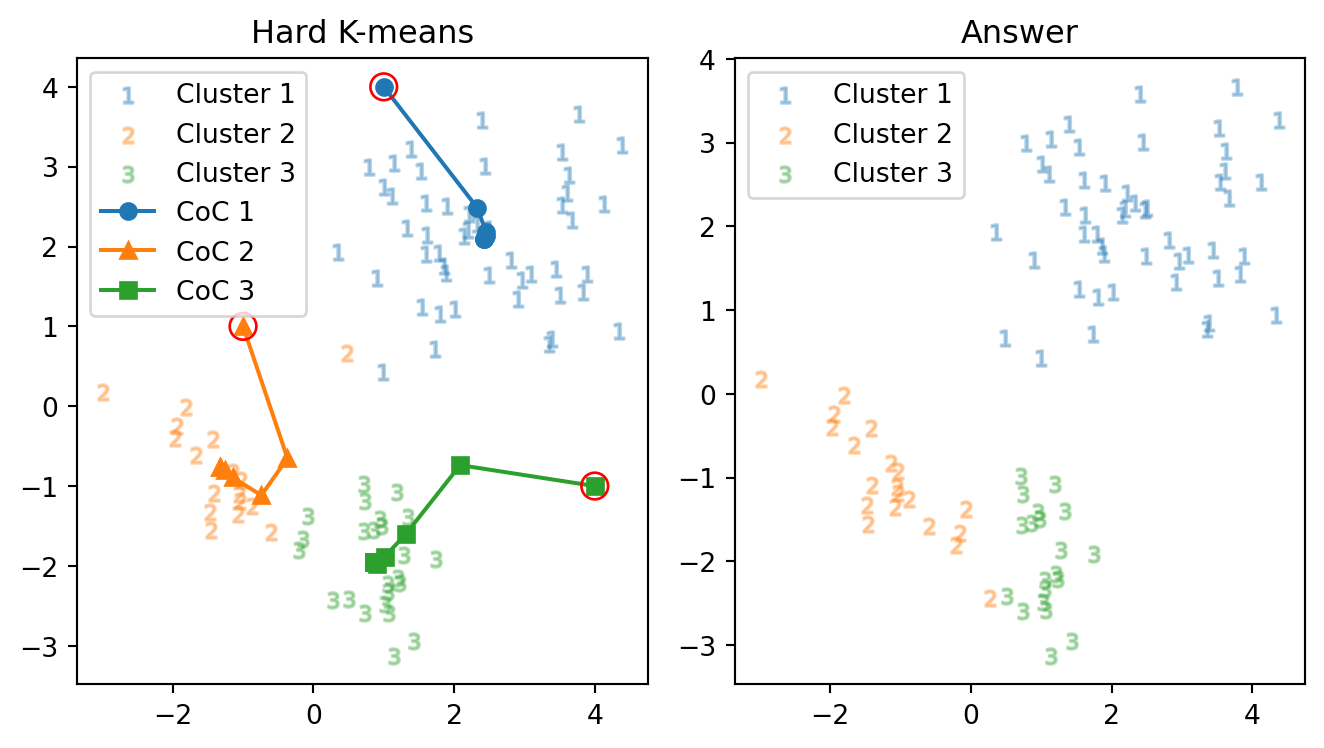

正解数: 85     正解率: 94.4 %     反復数: 7 回


In [7]:
#| echo: false
#| label: fig-2
#| fig-cap: 'ハード K-平均法によるクラスタリングの結果．初期値は $(m_1'',m_2,m_3)=\paren{\vctr{4}{-1},\vctr{1}{4},\vctr{-1}{1}}$．'

initial_points = np.array([[-1,1],[1,4],[4,-1]])

result = kmeans_2d(data1_2d, 3, initial_points.T, 0.1)
result.run_hard()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markerstyle = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markerstyle[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Hard K-means')

axs[0].legend()

# markerを使用したプロット
for marker in np.unique(markers1):
    axs[1].scatter(x1[markers1 == marker], y1[markers1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

axs[1].set_title('Answer')

axs[1].legend()

plt.tight_layout()
plt.show()

center_2 = history[-1, :, :]

num_correct, accr = accuracy(ans, normalize(pred))
iteration = history.shape[0]
print(f'正解数: {num_correct}     正解率: {accr*100:.1f} %     反復数: {iteration} 回')

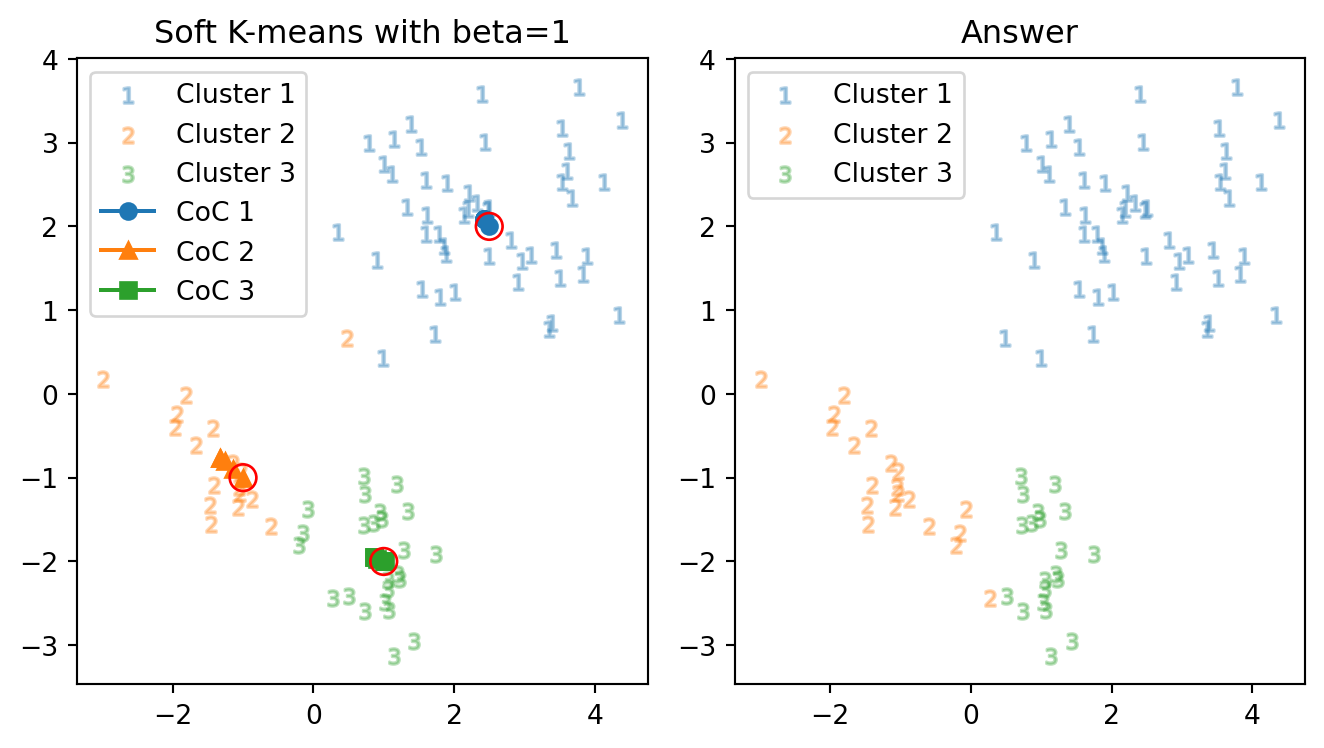

正解数: 85     正解率: 94.4 %     反復数: 5 回


In [8]:
#| echo: false
initial_points = np.array([[-1,-1],[1,-2],[2.5,2]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 0.1)
result.run_hard()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [2,0,1]
default = [0,1,2]
markerstyle = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markerstyle[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=1')

axs[0].legend()

# markerを使用したプロット
for marker in np.unique(markers1):
    axs[1].scatter(x1[markers1 == marker], y1[markers1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

axs[1].set_title('Answer')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct, accr = accuracy(ans, normalize(pred))
iteration = history.shape[0]
print(f'正解数: {num_correct}     正解率: {accr*100:.1f} %     反復数: {iteration} 回')

center1 = history[-1, :, :]

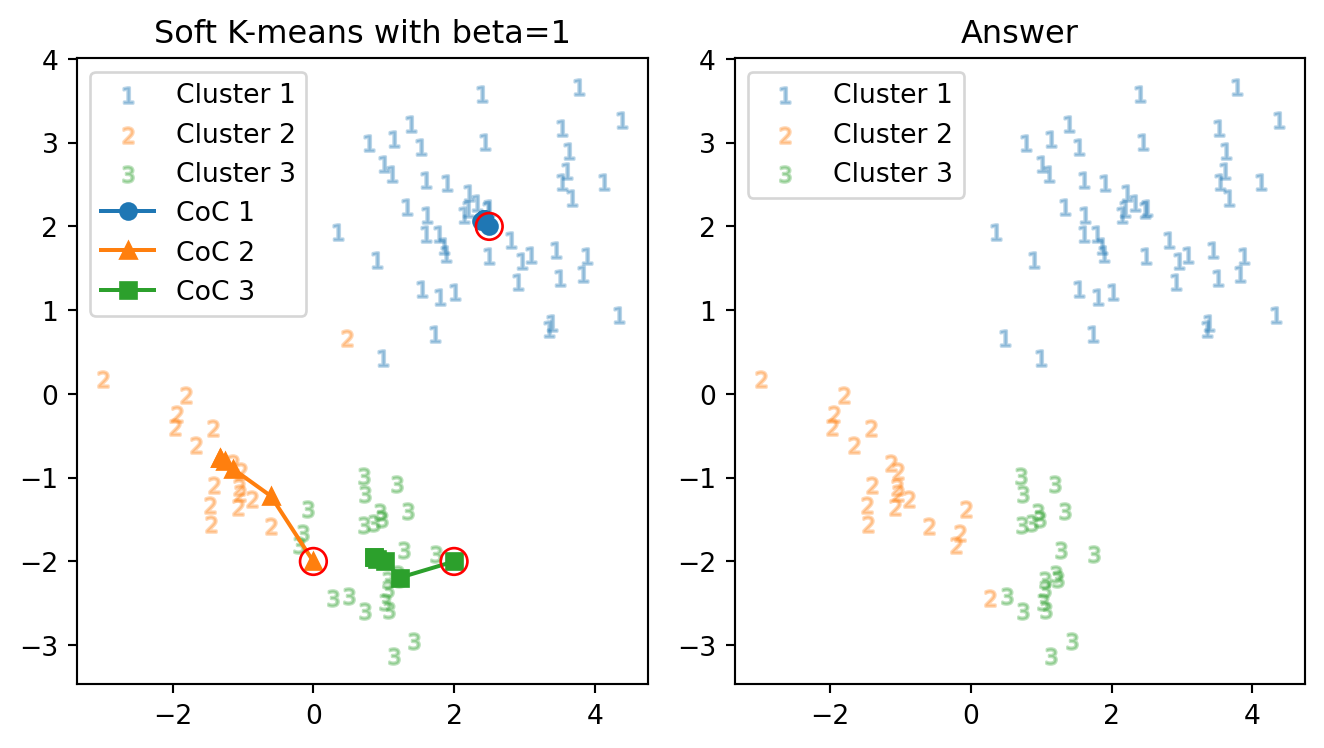

正解数: 85     正解率: 94.4 %     反復数: 6 回


In [9]:
#| echo: false
initial_points = np.array([[0,-2],[2,-2],[2.5,2]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 0.1)
result.run_hard()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [2,0,1]
default = [0,1,2]
markerstyle = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markerstyle[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=1')

axs[0].legend()

# markerを使用したプロット
for marker in np.unique(markers1):
    axs[1].scatter(x1[markers1 == marker], y1[markers1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

axs[1].set_title('Answer')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct, accr = accuracy(ans, normalize(pred))
iteration = history.shape[0]
print(f'正解数: {num_correct}     正解率: {accr*100:.1f} %     反復数: {iteration} 回')

center2 = history[-1, :, :]

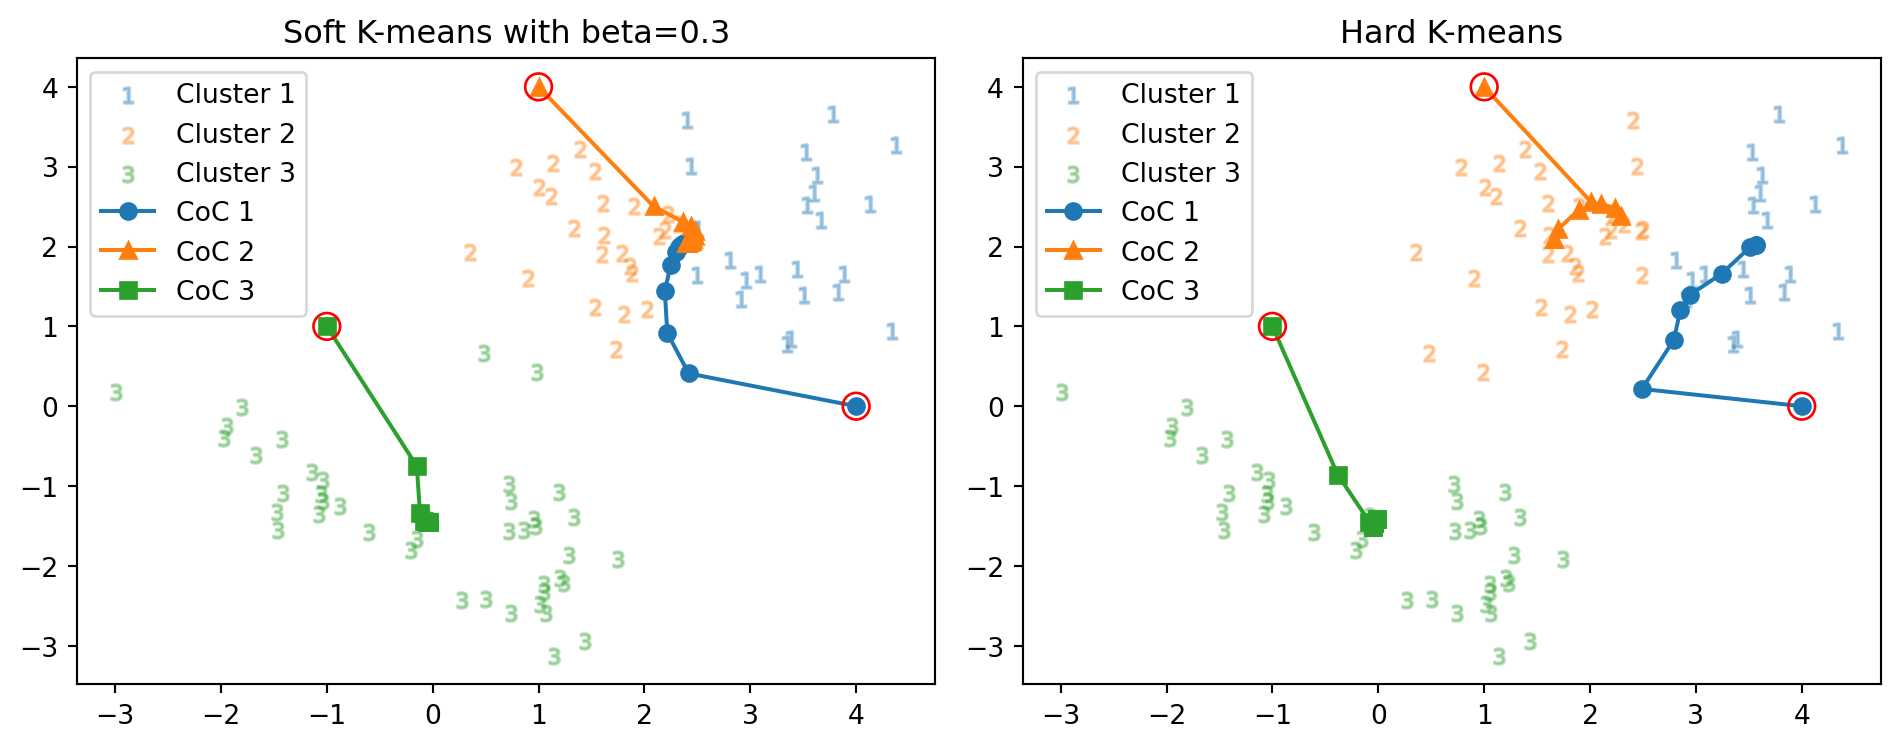

正解数: 44 vs. 51     正解率: 48.9 % vs. 56.7 %     反復数: 28 回 vs. 9 回


In [10]:
#| echo: false
#| label: fig-3
#| fig-cap: '左がソフト K-平均法（$\beta=1$），右がハード K-平均法によるクラスタリングの結果（図２の左と全く同じもの）．初期値は $(m_1,m_2,m_3)=\paren{\vctr{4}{0},\vctr{1}{4},\vctr{-1}{1}}$．赤丸で囲まれている点がクラスター中心 (CoC / Center of Cluster) の初期値で，その後の移動が図示されている．'
initial_points = np.array([[-1,1],[1,4],[4,0]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 0.3)
result.run_soft()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)

result2 = kmeans_2d(data1_2d, 3, initial_points.T, 1)
result2.run_hard()
pred2 = result2.fetch_cluster()
history2 = result2.fetch_history()

markers_pred2 = normalize(pred2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [2,1,0]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.3')

axs[0].legend()

for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [2,1,0]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Hard K-means')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize(pred))
iteration = history.shape[0]
num_correct2, accr2 = accuracy(ans, normalize(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}     正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %     反復数: {history.shape[0]} 回 vs. {history2.shape[0]} 回')

In [11]:
#| echo: false
center3 = history[-1, :, :]
df = pd.DataFrame(center3, columns=['Cluster1', 'Cluster2', 'Cluster3'])
df = df[['Cluster3', 'Cluster2', 'Cluster1']]
df.index = ['x', 'y']
df.columns = ['Cluster1', 'Cluster2', 'Cluster3']
print(df)

   Cluster1  Cluster2  Cluster3
x  2.397456  2.397535 -0.036071
y  2.047565  2.047580 -1.448288


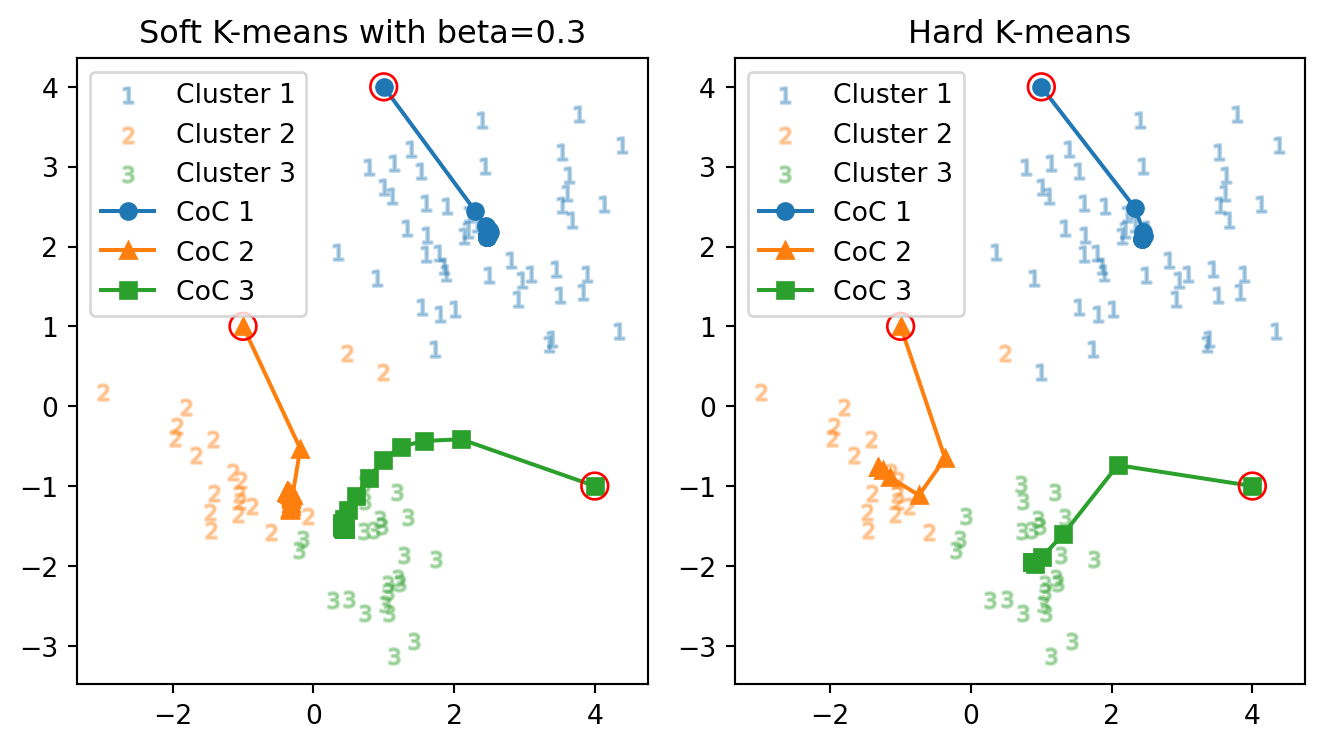

正解数: 85 vs. 85     正解率: 94.4 % vs. 94.4 %     反復数: 59 回 vs. 7 回


In [12]:
#| echo: false
#| label: fig-4
#| fig-cap: 'ソフト K-平均法（$\beta=1$）によるクラスタリングの結果，右がハード K-平均法によるクラスタリングの結果（図２の右と全く同じもの）．初期値は $(m_1'',m_2,m_3)=\paren{\vctr{4}{-1},\vctr{1}{4},\vctr{-1}{1}}$．'
initial_points = np.array([[-1,1],[1,4],[4,-1]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 0.3)
result.run_soft()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)

result2 = kmeans_2d(data1_2d, 3, initial_points.T, 1)
result2.run_hard()
pred2 = result2.fetch_cluster()
history2 = result2.fetch_history()

markers_pred2 = normalize(pred2)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.3')

axs[0].legend()

for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title("Hard K-means")

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize_abnormal(pred))
iteration = history.shape[0]
num_correct2, accr2 = accuracy(ans, normalize(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}     正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %     反復数: {history.shape[0]} 回 vs. {history2.shape[0]} 回')

In [13]:
#| echo: false
center4 = history[-1, :, :]
df = pd.DataFrame(center4, columns=['Cluster1', 'Cluster2', 'Cluster3'])
df = df[['Cluster2', 'Cluster1', 'Cluster3']]
df.index = ['x', 'y']
df.columns = ['Cluster1', 'Cluster2', 'Cluster3']
print(df)

   Cluster1  Cluster2  Cluster3
x  2.466833 -0.369537  0.447958
y  2.124961 -1.076874 -1.543758


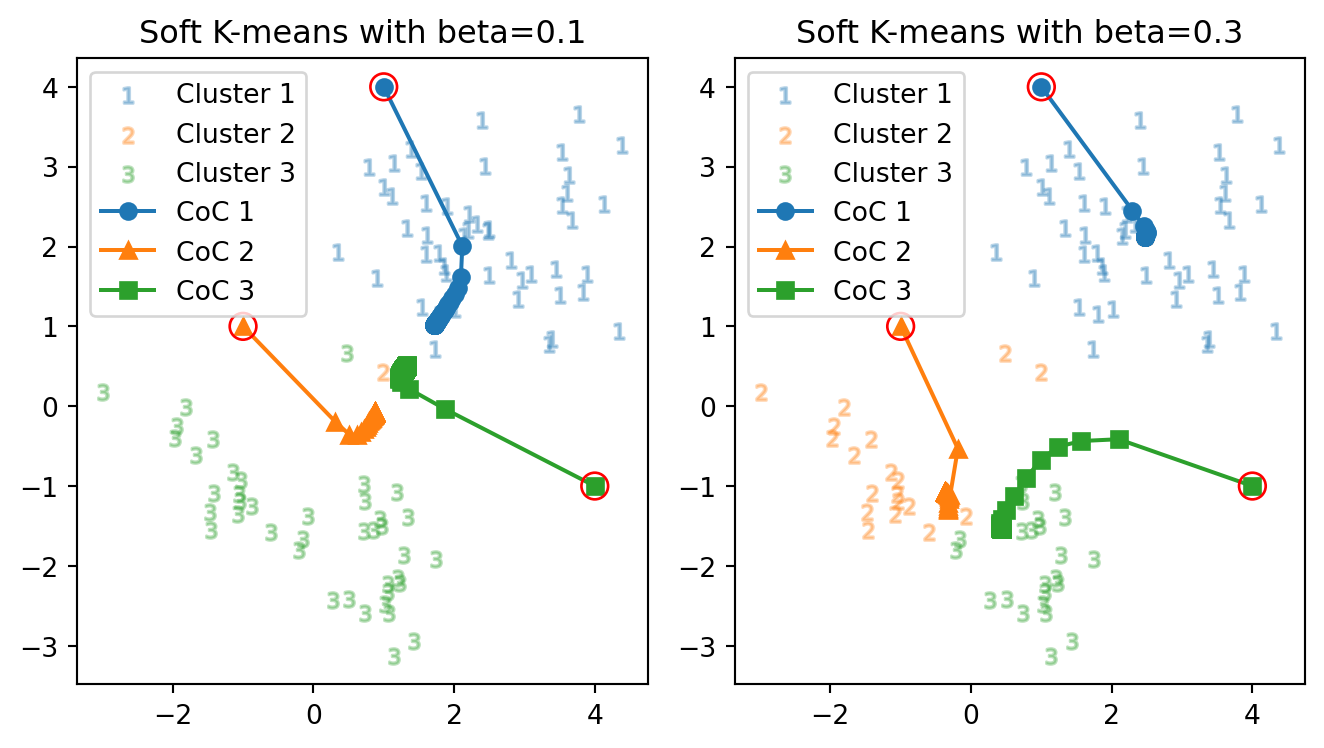

正解数: 68 vs. 85     正解率: 75.6 % vs. 94.4 %     反復数: 101 回 vs. 59 回


In [14]:
#| echo: false
#| label: fig-5
#| fig-cap: 'ソフト K-平均法（左$\beta=0.1$，右$\beta=1$）によるクラスタリングの結果．初期値は $(m_1'',m_2,m_3)=\paren{\vctr{4}{-1},\vctr{1}{4},\vctr{-1}{1}}$．'
initial_points = np.array([[-1,1],[1,4],[4,-1]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 0.1)
result.run_soft()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)

result2 = kmeans_2d(data1_2d, 3, initial_points.T, 0.3)
result2.run_soft()
pred2 = result2.fetch_cluster()
history2 = result2.fetch_history()

markers_pred2 = normalize(pred2)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.1')

axs[0].legend()

for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.3')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize(pred))
iteration = history.shape[0]
num_correct2, accr2 = accuracy(ans, normalize_abnormal(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}     正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %     反復数: {history.shape[0]} 回 vs. {history2.shape[0]} 回')

In [15]:
#| echo: false
center5 = history[-1, :, :]
df = pd.DataFrame(center5, columns=['Cluster1', 'Cluster2', 'Cluster3'])
df = df[['Cluster2', 'Cluster1', 'Cluster3']]
df.index = ['x', 'y']
df.columns = ['Cluster1', 'Cluster2', 'Cluster3']
print(df)

   Cluster1  Cluster2  Cluster3
x  1.715903  0.862511  1.329066
y  1.012398 -0.099845  0.511186


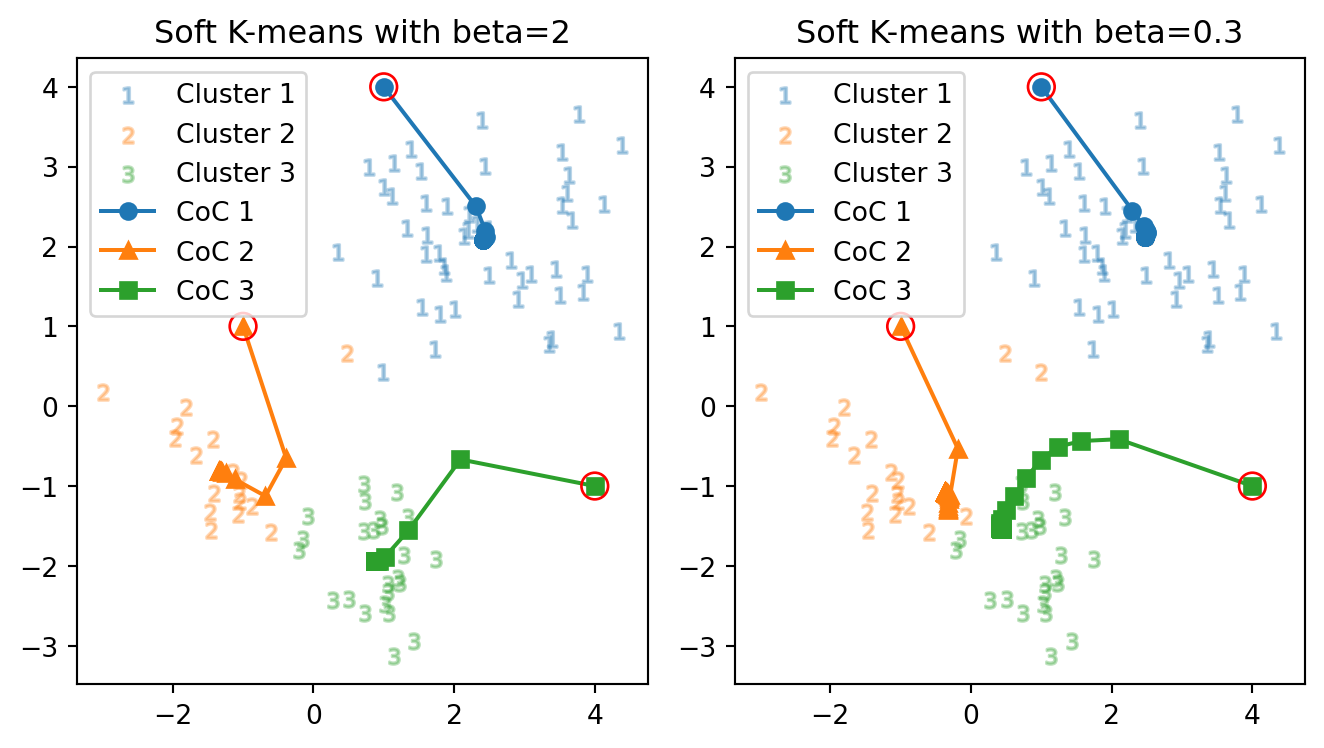

正解数: 85 vs. 85     正解率: 94.4 % vs. 94.4 %     反復数: 17 回 vs. 59 回


In [16]:
#| echo: false
#| label: fig-6
#| fig-cap: 'ソフト K-平均法（左$\beta=10$，右$\beta=1$）によるクラスタリングの結果．初期値は $(m_1'',m_2,m_3)=\paren{\vctr{4}{-1},\vctr{1}{4},\vctr{-1}{1}}$．'
initial_points = np.array([[-1,1],[1,4],[4,-1]])
result = kmeans_2d(data1_2d, 3, initial_points.T, 2)
result.run_soft()
pred = result.fetch_cluster()
history = result.fetch_history()
ans = data1.iloc[:, 0]

markers_pred = normalize(pred)

result2 = kmeans_2d(data1_2d, 3, initial_points.T, 0.3)
result2.run_soft()
pred2 = result2.fetch_cluster()
history2 = result2.fetch_history()

markers_pred2 = normalize(pred2)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred):
    axs[0].scatter(x1[markers_pred == marker], y1[markers_pred == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=2')

axs[0].legend()

for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.3')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize(pred))
iteration = history.shape[0]
num_correct2, accr2 = accuracy(ans, normalize_abnormal(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}     正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %     反復数: {history.shape[0]} 回 vs. {history2.shape[0]} 回')

In [17]:
#| echo: false
center6 = history[-1, :, :]
df1 = pd.DataFrame(center6, columns=['Cluster1', 'Cluster2', 'Cluster3'])
df1 = df1[['Cluster2', 'Cluster3', 'Cluster1']]
df1.index = ['x', 'y']
df1.columns = ['Cluster1', 'Cluster2', 'Cluster3']
print(df1)

   Cluster1  Cluster2  Cluster3
x  2.416113  0.881629 -1.338782
y  2.086327 -1.934090 -0.816316


In [18]:
#| echo: false
df2 = pd.DataFrame(center_2, columns=['Cluster1', 'Cluster2', 'Cluster3'])
df2 = df2[['Cluster2', 'Cluster3', 'Cluster1']]
df2.index = ['x', 'y']
df2.columns = ['Cluster1', 'Cluster2', 'Cluster3']
print(df2)

   Cluster1  Cluster2  Cluster3
x  2.426102  0.868333 -1.323353
y  2.091429 -1.948458 -0.765176


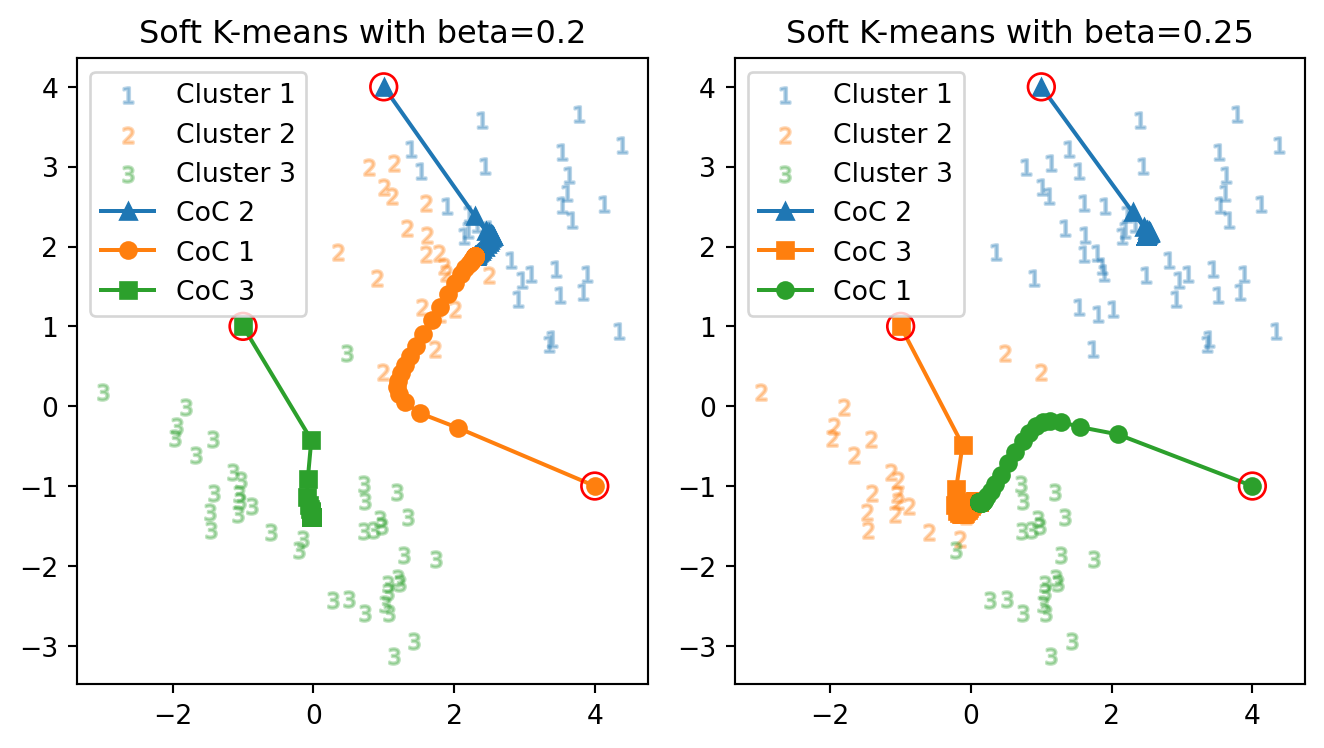

正解数: 50 vs. 86
正解率: 55.6 % vs. 95.6 %


In [19]:
#| echo: false
#| label: fig-7
#| fig-cap: ソフト K-平均法によるクラスタリングの結果の比較（$\beta=0.2$ vs. $\beta=0.25$）．
initial_points = np.array([[-1,1],[1,4],[4,-1]])
result1 = kmeans_2d(data1_2d, 3, initial_points.T, 0.2)
result2 = kmeans_2d(data1_2d, 3, initial_points.T, 0.25)
result1.run_soft()
result2.run_soft()
pred1 = result1.fetch_cluster()
pred2 = result2.fetch_cluster()
history1 = result1.fetch_history()
history2 = result2.fetch_history()
ans = data1.iloc[:, 0]

markers_pred1 = normalize(pred1)
markers_pred2 = normalize(pred2)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred1):
    axs[0].scatter(x1[markers_pred1 == marker], y1[markers_pred1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,2,0]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i in rearrange:  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[2-i], label=f'CoC {3-i}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.2')

axs[0].legend()


# marker_predを使用したプロット
for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
for i in rearrange:  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[2-i], label=f'CoC {3-i}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.25')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize_abnormal(pred1))
num_correct2, accr2 = accuracy(ans, normalize_abnormal(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}')
print(f'正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %')

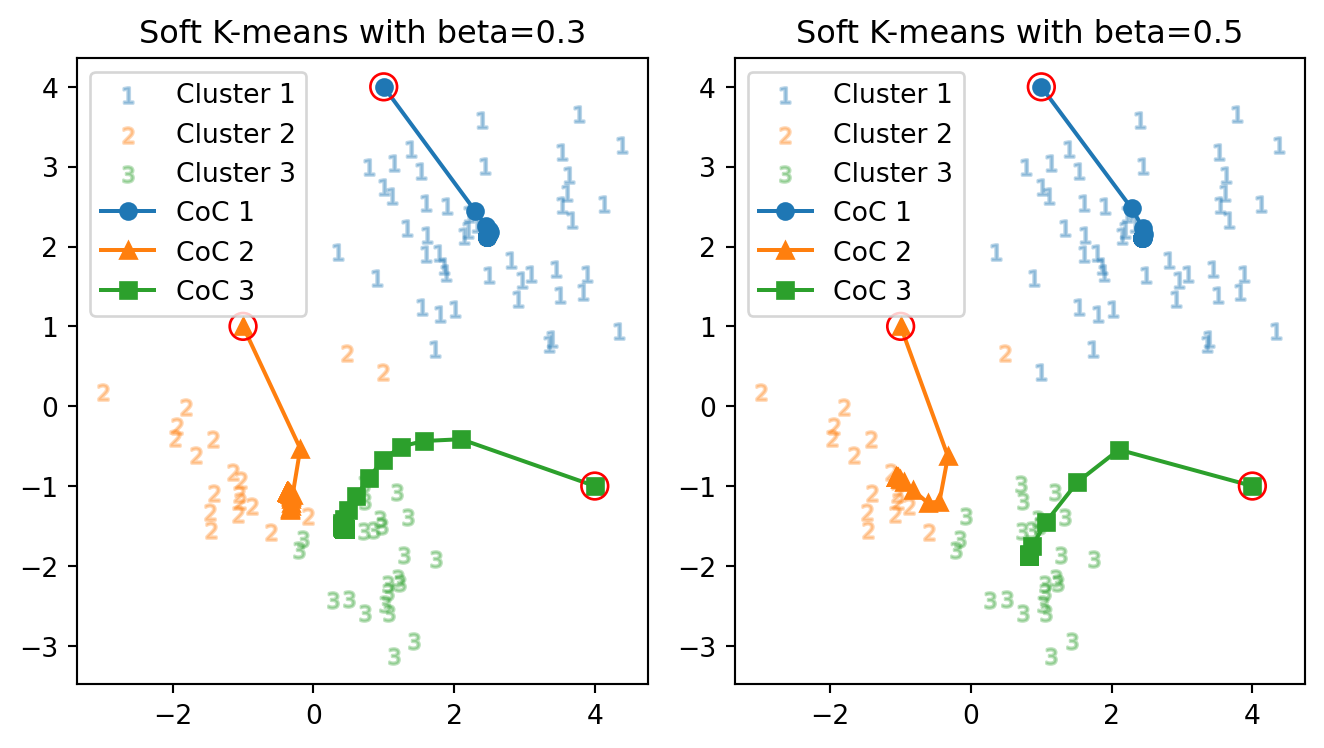

正解数: 85 vs. 85
正解率: 94.4 % vs. 94.4 %


In [20]:
#| echo: false
#| label: fig-8
#| fig-cap: ソフト K-平均法によるクラスタリングの結果の比較（$\beta=0.3$ vs. $\beta=0.5$）．
initial_points = np.array([[-1,1],[1,4],[4,-1]])
result1 = kmeans_2d(data1_2d, 3, initial_points.T, 0.3)
result2 = kmeans_2d(data1_2d, 3, initial_points.T, 0.5)
result1.run_soft()
result2.run_soft()
pred1 = result1.fetch_cluster()
pred2 = result2.fetch_cluster()
history1 = result1.fetch_history()
history2 = result2.fetch_history()
ans = data1.iloc[:, 0]

markers_pred1 = normalize(pred1)
markers_pred2 = normalize(pred2)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred1):
    axs[0].scatter(x1[markers_pred1 == marker], y1[markers_pred1 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
default = [0,1,2]
markers = ['o', '^', 's']  # マーカーの形（丸、三角、正方形）
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.3')

axs[0].legend()


# marker_predを使用したプロット
for marker in np.unique(markers_pred2):
    axs[1].scatter(x1[markers_pred2 == marker], y1[markers_pred2 == marker], label=f'Cluster {marker}', marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,2]
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.5')

axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy(ans, normalize_abnormal(pred1))
num_correct2, accr2 = accuracy(ans, normalize(pred2))
print(f'正解数: {num_correct1} vs. {num_correct2}')
print(f'正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %')

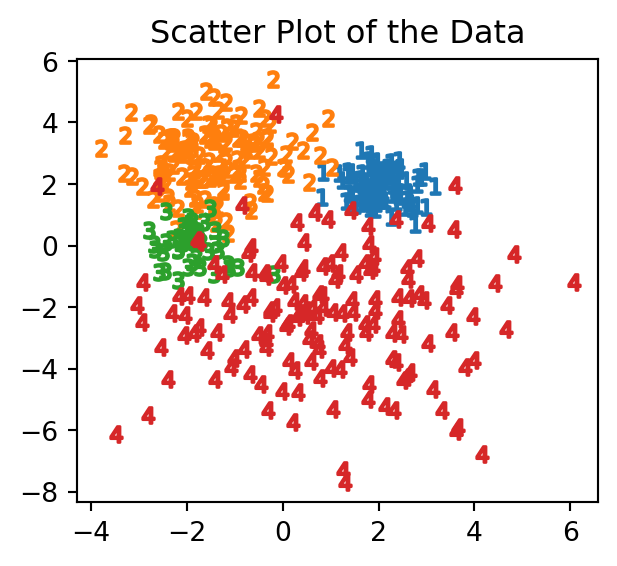

In [21]:
#| echo: false

data2_unsorted = pd.read_csv('mixture2.dat', delimiter="\t" , header=None)
data2 = data2_unsorted.sort_values(by=0, ascending=True)
data2_2d = data2.iloc[:, 1:3].to_numpy()

markers2 = data2.iloc[:, 0]
x2 = data2.iloc[:, 1]
y2 = data2.iloc[:, 2]

plt.figure(figsize=(3.5, 3))
for marker in np.unique(markers2):
    plt.scatter(x2[markers2 == marker], y2[markers2 == marker], label=f'Cluster {marker}', marker=f'${marker}$') 

plt.title('Scatter Plot of the Data')
plt.show()

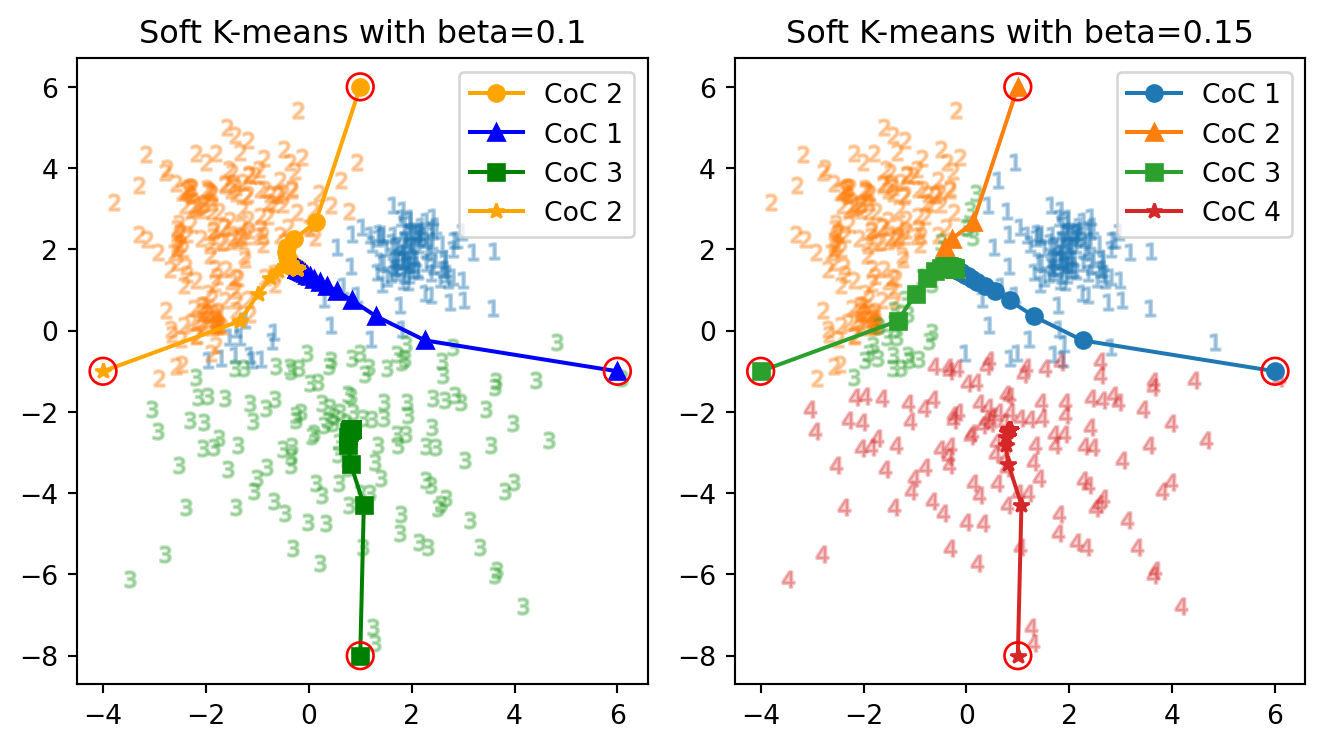

In [22]:
#| echo: false
initial_points = np.array([[1,6],[6,-1],[1,-8],[-4,-1]])
result1 = kmeans_2d(data2_2d, 4, initial_points.T, 0.1)
result2 = kmeans_2d(data2_2d, 4, initial_points.T, 0.15)
result1.run_soft()
result2.run_soft()
pred1 = result1.fetch_cluster()
pred2 = result2.fetch_cluster()
history1 = result1.fetch_history()
history2 = result2.fetch_history()
ans = data2.iloc[:, 0]

markers_pred1 = normalize(pred1)
markers_pred2 = normalize(pred2)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred1):
    axs[0].scatter(x2[markers_pred1 == marker], y2[markers_pred1 == marker], marker=f'${marker}$', alpha=0.3),  # markerパラメータによって形状を指定

rearrange = [0,1,2,3]
default = [0,1,2,3]
labels = [2,1,3,2]
markers = ['o', '^', 's', '*']
colors = ['orange', 'blue', 'green', 'orange']
for i,j,k in zip(rearrange, default, labels):  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, color=colors[j], linestyle='-', marker=markers[j], label=f'CoC {k}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.1')
axs[0].legend()


# marker_predを使用したプロット
for marker in np.unique(markers_pred2):
    axs[1].scatter(x2[markers_pred2 == marker], y2[markers_pred2 == marker], marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,3,2]
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.15')
axs[1].legend()

plt.tight_layout()
plt.show()

num_correct1, accr1 = accuracy4(ans, normalize(pred1))
num_correct2, accr2 = accuracy4(ans, normalize(pred2))
iteration1 = history1.shape[0]
iteration2 = history2.shape[0]

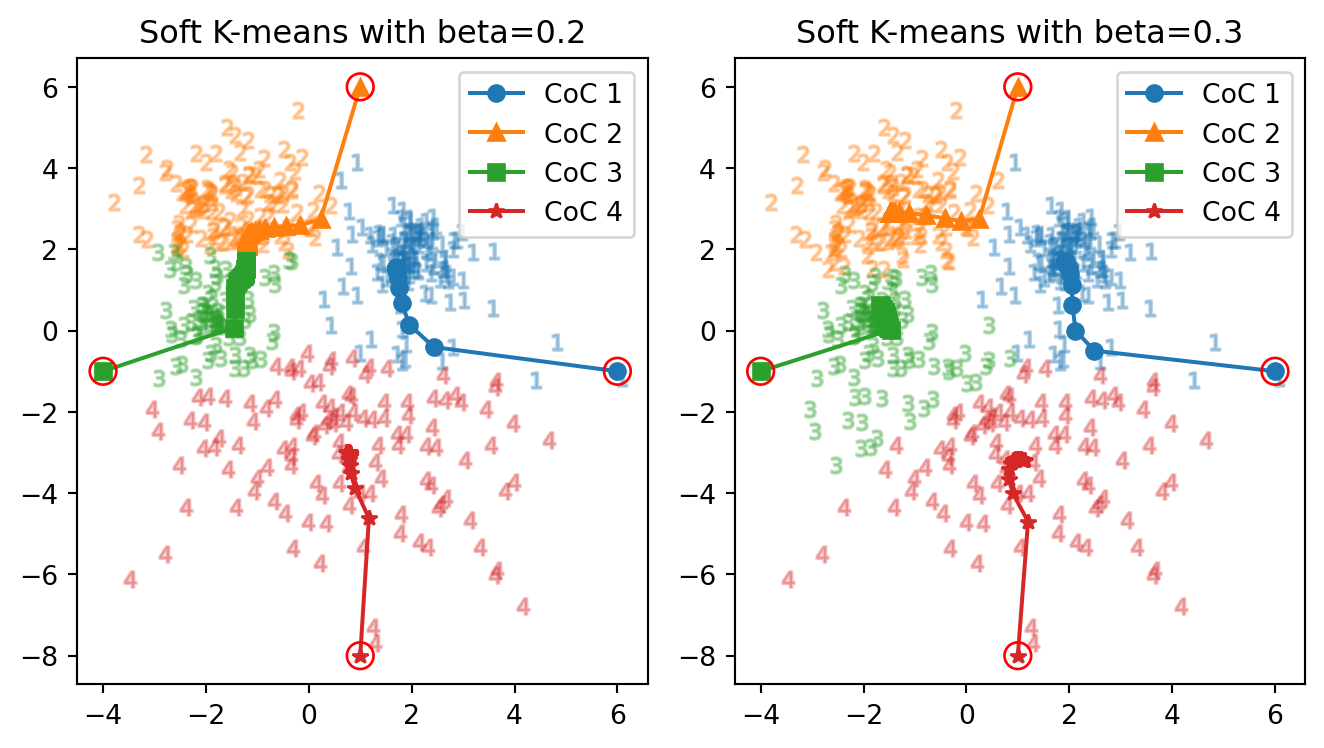

In [23]:
#| echo: false
result1 = kmeans_2d(data2_2d, 4, initial_points.T, 0.2)
result2 = kmeans_2d(data2_2d, 4, initial_points.T, 0.3)
result1.run_soft()
result2.run_soft()
pred1 = result1.fetch_cluster()
pred2 = result2.fetch_cluster()
history1 = result1.fetch_history()
history2 = result2.fetch_history()
ans = data2.iloc[:, 0]

markers_pred1 = normalize(pred1)
markers_pred2 = normalize(pred2)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred1):
    axs[0].scatter(x2[markers_pred1 == marker], y2[markers_pred1 == marker], marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,3,2]
default = [0,1,2,3]
markers = ['o', '^', 's', '*']
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.2')
axs[0].legend()


# marker_predを使用したプロット
for marker in np.unique(markers_pred2):
    axs[1].scatter(x2[markers_pred2 == marker], y2[markers_pred2 == marker], marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Soft K-means with beta=0.3')
axs[1].legend()

plt.tight_layout()
plt.show()

num_correct3, accr3 = accuracy4(ans, normalize(pred1))
num_correct4, accr4 = accuracy4(ans, normalize(pred2))
iteration3 = history1.shape[0]
iteration4 = history2.shape[0]

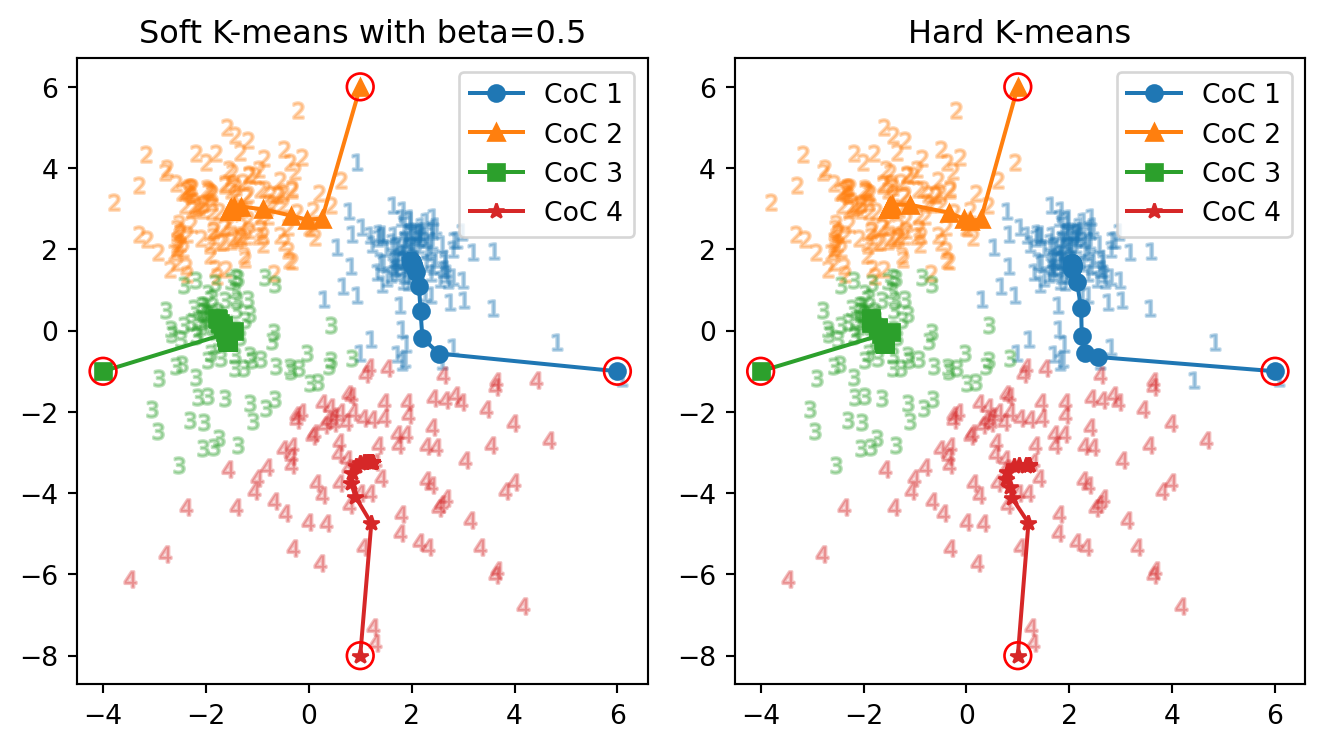

In [24]:
#| echo: false
result1 = kmeans_2d(data2_2d, 4, initial_points.T, 0.5)
result2 = kmeans_2d(data2_2d, 4, initial_points.T, 1)
result1.run_soft()
result2.run_hard()
pred1 = result1.fetch_cluster()
pred2 = result2.fetch_cluster()
history1 = result1.fetch_history()
history2 = result2.fetch_history()
ans = data2.iloc[:, 0]

markers_pred1 = normalize(pred1)
markers_pred2 = normalize(pred2)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))  # 1行2列のサブプロット

# marker_predを使用したプロット
for marker in np.unique(markers_pred1):
    axs[0].scatter(x2[markers_pred1 == marker], y2[markers_pred1 == marker], marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

rearrange = [1,0,3,2]
default = [0,1,2,3]
markers = ['o', '^', 's', '*']
for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history1[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history1[:, 1, i]  # i番目の点の全時点でのy座標
    axs[0].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[0].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[0].set_title('Soft K-means with beta=0.5')
axs[0].legend()


# marker_predを使用したプロット
for marker in np.unique(markers_pred2):
    axs[1].scatter(x2[markers_pred2 == marker], y2[markers_pred2 == marker], marker=f'${marker}$', alpha=0.3)  # markerパラメータによって形状を指定

for i,j in zip(rearrange, default):  # 点の数だけ繰り返し
    x_coords = history2[:, 0, i]  # i番目の点の全時点でのx座標
    y_coords = history2[:, 1, i]  # i番目の点の全時点でのy座標
    axs[1].plot(x_coords, y_coords, linestyle='-', marker=markers[j], label=f'CoC {j+1}', zorder=1)

axs[1].scatter(initial_points[:, 0], initial_points[:, 1], facecolors='none', edgecolors='red', s=100, zorder=2)

axs[1].set_title('Hard K-means')
axs[1].legend()

plt.tight_layout()
plt.show()

num_correct5, accr5 = accuracy4(ans, normalize(pred1))
num_correct6, accr6 = accuracy4(ans, normalize(pred2))
iteration5 = history1.shape[0]
iteration6 = history2.shape[0]

In [25]:
#| echo: false
print(f'正解数: {num_correct1} vs. {num_correct2}     正解率: {accr1*100:.1f} % vs. {accr2*100:.1f} %     反復数: {iteration1} 回 vs. {iteration2} 回')
print(f'正解数: {num_correct3} vs. {num_correct4}     正解率: {accr3*100:.1f} % vs. {accr4*100:.1f} %     反復数: {iteration3} 回 vs. {iteration4} 回')
print(f'正解数: {num_correct5} vs. {num_correct6}     正解率: {accr5*100:.1f} % vs. {accr6*100:.1f} %     反復数: {iteration5} 回 vs. {iteration6} 回')

正解数: 377 vs. 366     正解率: 83.8 % vs. 81.3 %     反復数: 49 回 vs. 62 回
正解数: 386 vs. 375     正解率: 85.8 % vs. 83.3 %     反復数: 101 回 vs. 70 回
正解数: 378 vs. 378     正解率: 84.0 % vs. 84.0 %     反復数: 39 回 vs. 14 回
